# Null Models

In this workbook, we will look at a network of US airports and determine if its characteristics are significantly different from random networks.

In [28]:
# Importing the required libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [29]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [30]:
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [31]:
# Read in the netflix actor-director network

#path to the file
# Path to your GEXF file
from networkx import is_connected

gexf_file_path = "./movie_network_undirected.gexf"

# Read the GEXF file and create a graph object
netflix_graph = nx.read_gexf(gexf_file_path)

#netflix_graph = netflix_graph2.to_undirected()
print("Total Number of Nodes: ", netflix_graph.number_of_nodes())
print("Total Number of Edges: ", netflix_graph.number_of_edges())
print("Is graph connected? ", is_connected(netflix_graph))
#can disconnected components exist?

degrees = [netflix_graph.degree(node) for node in netflix_graph]
kmin = min(degrees)
kmax = max(degrees)
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)
print("Average degree (alternate calculation)", np.mean(degrees)) #calculating the avg degree using graph calculation



Total Number of Nodes:  35133
Total Number of Edges:  95508
Is graph connected?  False

Minimum degree:  1
Maximum degree:  133
Average degree (alternate calculation) 5.436939629408249


In [32]:
# Calculate the average clustering coefficient
average_cc = nx.average_clustering(netflix_graph)

print("Average Clustering Coefficient:", average_cc)

Average Clustering Coefficient: 0.6448355677952495


In [26]:
# Get a list of all connected components
connected_components = list(nx.connected_components(netflix_graph))

# Find the largest connected component
largest_component = max(connected_components, key=len)

print("Nodes in the largest connected component:", largest_component)
print("Size of the largest connected component:", len(largest_component))



Nodes in the largest connected component: {'Dude', 'Elie Mitri', 'Fools Rush In', 'Gauhar Khan', 'Mitsuki Yayoi', 'Nabila Ebeid', 'Pharrell Williams', 'Sumeet Vyas', 'Karim Abdel Aziz', 'Hugh Keays-Byrne', 'Desiree Akhavan', 'Esteban Rojas', 'Yuki Matsuoka', 'Samantha Mumba', 'Toney Montana', 'Isha Rikhi', 'Johnny Flynn', 'Jennifer Yuh Nelson', 'Gardeners of Eden', 'Vishal Om Prakash', 'Kottayam Purushan', 'Nathalia Ramos', 'Alejandro Oliva', 'Vaya', 'John DeMita', 'Graham Norton', 'Martin Wuttke', 'Roxy Antak', 'Lady Bloodfight', 'Michelle Brookhurst', 'Manjinder Virk', 'Brian Regan: On the Rocks', 'John Tartaglia', 'Chase Williamson', 'Brahmaji', 'Noor Naghmi', 'Neda Margrethe Labba', 'Kristen Johnston', 'Jenna Ortega', 'Rebekah Graf', 'Francis Weddey', 'Michael Whitehall', 'Hardik Mehta', 'Jung-min Hwang', 'Anna Chlumsky', 'Sonya Balmores Chung', 'Janani Iyer', 'Bada Oh Deniz', 'Aakhri Adaalat', 'Noah Matthews', 'Sanjay Sharma', 'Reem Kherici', 'Doug Erholtz', 'Mystic River', 'Darre

In [10]:
# Get the largest connected component
largest_component = max(nx.connected_components(netflix_graph), key=len)

# Create a subgraph containing only the largest connected component
largest_component_graph = netflix_graph.subgraph(largest_component)
print("Nodes in the largest connected component:", largest_component)
# Calculate the average clustering coefficient of the largest connected component
average_cc = nx.average_clustering(largest_component_graph)

print("Average Clustering Coefficient of the largest connected component:", average_cc)

Nodes in the largest connected component: {'Dude', 'Elie Mitri', 'Fools Rush In', 'Gauhar Khan', 'Mitsuki Yayoi', 'Nabila Ebeid', 'Pharrell Williams', 'Sumeet Vyas', 'Karim Abdel Aziz', 'Hugh Keays-Byrne', 'Desiree Akhavan', 'Esteban Rojas', 'Yuki Matsuoka', 'Samantha Mumba', 'Toney Montana', 'Isha Rikhi', 'Johnny Flynn', 'Jennifer Yuh Nelson', 'Gardeners of Eden', 'Vishal Om Prakash', 'Kottayam Purushan', 'Nathalia Ramos', 'Alejandro Oliva', 'Vaya', 'John DeMita', 'Graham Norton', 'Martin Wuttke', 'Roxy Antak', 'Lady Bloodfight', 'Michelle Brookhurst', 'Manjinder Virk', 'Brian Regan: On the Rocks', 'John Tartaglia', 'Chase Williamson', 'Brahmaji', 'Noor Naghmi', 'Neda Margrethe Labba', 'Kristen Johnston', 'Jenna Ortega', 'Rebekah Graf', 'Francis Weddey', 'Michael Whitehall', 'Hardik Mehta', 'Jung-min Hwang', 'Anna Chlumsky', 'Sonya Balmores Chung', 'Janani Iyer', 'Bada Oh Deniz', 'Aakhri Adaalat', 'Noah Matthews', 'Sanjay Sharma', 'Reem Kherici', 'Doug Erholtz', 'Mystic River', 'Darre

In [27]:
# Calculate the average shortest path length in the graph
average_path_length = nx.average_shortest_path_length(largest_component_graph)

print("Average shortest path length in the graph:", average_path_length)

KeyboardInterrupt: 

In [ ]:
# Calculate the average shortest path length in the graph
average_negighbour_degree = nx.average_neighbor_degree(netflix_graph)

print("Average shortest path length in the graph:", average_negighbour_degree)

In [12]:
#nodes with degree 1
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "cast"):
        if (netflix_graph.degree(node)) == 1:
            print("Node With  degree (1) : {0}\t\t: {1}".format(node, data))  


In [33]:
#Finding node with highest degree(s)
#max degree --> kmax
#Min degree --> kmin
print("Degree sequence --> ")
print([netflix_graph.degree(node) for node in netflix_graph])

#reverse sort the list
print(sorted(degrees, reverse=True))
print("Max degree: ", kmax)

#getting the movie with highest degree
highest_movie_degree = -1
highest_movie_degree_nodes = []
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "movie"):
        if (netflix_graph.degree(node)) >= highest_movie_degree:
            highest_movie_degree = netflix_graph.degree(node)
print("Highest Degree in Movie --> ", highest_movie_degree)

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "movie"):
        if (netflix_graph.degree(node)) == highest_movie_degree:
            print("*")
            highest_movie_degree_nodes.append(node)

for movie in highest_movie_degree_nodes:
    print("Movie with highest degree: ", movie)

#finding the movie with highest degree
#finding degree of a node: print(netflix_graph.degree("Robert Cullen"))
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "movie"):
        if (netflix_graph.degree(node)) == kmax:
            print("Node With highest degree: {0}\t\t: {1}".format(node, data))  


Degree sequence --> 
[12, 11, 11, 15, 9, 26, 7, 5, 24, 9, 19, 7, 3, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 8, 14, 10, 10, 6, 6, 2, 4, 2, 20, 2, 12, 12, 2, 2, 6, 2, 4, 2, 2, 2, 2, 2, 2, 11, 45, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 11, 11, 10, 10, 4, 2, 2, 2, 6, 2, 2, 2, 7, 7, 4, 2, 2, 2, 20, 4, 6, 25, 27, 7, 7, 7, 3, 5, 5, 2, 18, 4, 7, 17, 6, 11, 16, 9, 12, 40, 32, 20, 29, 13, 15, 34, 20, 32, 14, 6, 2, 11, 42, 6, 7, 17, 4, 2, 2, 2, 2, 2, 2, 11, 66, 6, 23, 22, 20, 8, 11, 2, 4, 10, 4, 10, 16, 30, 19, 15, 8, 6, 20, 6, 9, 4, 11, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 11, 2, 4, 8, 6, 4, 2, 4, 4, 2, 6, 10, 10, 4, 4, 4, 4, 7, 2, 2, 2, 2, 11, 126, 4, 2, 6, 4, 2, 4, 2, 2, 2, 11, 11, 2, 2, 2, 2, 2, 2, 11, 11, 35, 4, 2, 4, 13, 10, 2, 2, 2, 2, 9, 20, 2, 15, 5, 10, 6, 2, 10, 11, 11, 22, 28, 13, 28, 19, 4, 4, 22, 8, 4, 12, 51, 25, 8, 12, 10, 4, 14, 6, 12, 6, 14, 11, 28, 8, 10, 3, 8, 10, 8, 6, 4, 7, 2, 9, 6, 9, 5, 11, 3, 5, 3, 11, 2, 2, 11, 45, 14, 14, 9, 11, 5, 3, 5, 3, 3, 5, 12, 30, 6, 2, 2, 7, 6, 5, 4, 14, 

In [34]:
#getting actor with higest degree
highest_cast_degree = -1
highest_cast_degree_nodes = []
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "cast"):
        if (netflix_graph.degree(node)) >= highest_cast_degree:
            highest_cast_degree = netflix_graph.degree(node)
print("Highest Degree in Cast --> ", highest_cast_degree)

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "cast"):
        if (netflix_graph.degree(node)) == highest_cast_degree:
            print("*")
            highest_cast_degree_nodes.append(node)

for cast in highest_cast_degree_nodes:
    print("Cast with highest degree: ", cast)


Highest Degree in Cast -->  84
*
Cast with highest degree:  Kunle Afolayan


In [15]:
#===============================
print("=================================")
#getting director with higest degree
highest_dir_degree = -1
highest_dir_degree_nodes = []
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "director"):
        if (netflix_graph.degree(node)) >= highest_dir_degree:
            highest_dir_degree = netflix_graph.degree(node)
print("Highest Degree in director --> ", highest_dir_degree)

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "director"):
        if (netflix_graph.degree(node)) == highest_dir_degree:
            print("*")
            highest_dir_degree_nodes.append(node)

for dirs in highest_dir_degree_nodes:
    print("Director with highest degree: ", dirs)


Highest Degree in director -->  133
*
Director with highest degree:  Martin Scorsese


### Degree Vs Number of Nodes

In [8]:
print("Degree sequence --> ")
print(sorted([netflix_graph.degree(node) for node in netflix_graph]))

#dictionary of degree and how many nodes have that degree
dict_degree_number = {}

#initialize the dict_degee_number dict
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

for degree in range(kmin-1, kmax+2):
    dict_degree_number[degree] = 0

# print([netflix_graph.degree(node) for node in netflix_graph].count(12))

print("dict_degree_number: (before)", dict_degree_number)
for node in netflix_graph:
   dict_degree_number[netflix_graph.degree(node)] = dict_degree_number[netflix_graph.degree(node)] + 1

print("dict_degree_number: (after)", dict_degree_number)

Degree sequence --> 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [9]:
#nodes with degree 1
degree_to_check = 1
deg_nodes = 0
for nodes in netflix_graph:
    if(netflix_graph.degree(nodes) == degree_to_check):
        deg_nodes = deg_nodes + 1
print(deg_nodes)

21558


In [10]:
#movies with degree one

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (netflix_graph.degree(node)) == 1:
        if(data["type"] == 'movie'):
            print("Node {0}\t\t\t: {1}".format(node, data))  



Node Myriam Fares: The Journey			: {'type': 'movie', 'label': 'Myriam Fares: The Journey'}
Node Bo Burnham: Inside			: {'type': 'movie', 'label': 'Bo Burnham: Inside'}
Node Chris Rock Total Blackout: The Tamborine Extended Cut			: {'type': 'movie', 'label': 'Chris Rock Total Blackout: The Tamborine Extended Cut'}
Node Vir Das: Outside In - The Lockdown Special			: {'type': 'movie', 'label': 'Vir Das: Outside In - The Lockdown Special'}
Node La Gran Ilusión			: {'type': 'movie', 'label': 'La Gran Ilusión'}
Node Panoptic			: {'type': 'movie', 'label': 'Panoptic'}
Node Stars in the Sky: A Hunting Story			: {'type': 'movie', 'label': 'Stars in the Sky: A Hunting Story'}
Node WHAT DID JACK DO?			: {'type': 'movie', 'label': 'WHAT DID JACK DO?'}
Node Oththa Seruppu Size 7			: {'type': 'movie', 'label': 'Oththa Seruppu Size 7'}
Node Merata: How Mum Decolonised the Screen			: {'type': 'movie', 'label': 'Merata: How Mum Decolonised the Screen'}
Node HOMECOMING: A film by Beyoncé			: {'type': 'm

In [16]:
#graph


#make a bar graph out of it
x = list(dict_degree_number.keys())
y = list(dict_degree_number.values())
# Creating the bar graph

plt.figure(figsize=(20, 10))  # Adjust figure size as needed
#plt.bar(keys, values)

bars = plt.bar(x, y)

# Adding labels and title
plt.xlabel('TV - Ratings')
plt.ylabel('Occurances')
plt.title('Bar Graph of TV-Ratings')

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Display the graph
plt.show()


NameError: name 'dict_degree_number' is not defined

In [15]:
#getting number of connected components of the graph
connected_components = list(nx.connected_components(netflix_graph))

num_components = nx.number_connected_components(netflix_graph)

print("Number of connected components:", num_components)

Number of connected components: 512


In [12]:
# Find the connected components
connected_components = list(nx.connected_components(netflix_graph))

# Get the nodes that belong to components with only one node
disconnected_nodes = [node for node in netflix_graph.nodes() if len([cc for cc in connected_components if node in cc]) == 1]

print("Disconnected nodes:", disconnected_nodes)

for nodes in disconnected_nodes:
    print(nodes)

Disconnected nodes: ['My Little Pony: A New Generation', 'Robert Cullen', 'José Luis Ucha', 'Vanessa Hudgens', 'Kimiko Glenn', 'James Marsden', 'Sofia Carson', 'Liza Koshy', 'Ken Jeong', 'Elizabeth Perkins', 'Jane Krakowski', 'Michael McKean', 'Phil LaMarr', 'Sankofa', 'Haile Gerima', 'Kofi Ghanaba', 'Oyafunmike Ogunlano', 'Alexandra Duah', 'Nick Medley', 'Mutabaruka', 'Afemo Omilami', 'Reggie Carter', 'Mzuri', 'The Starling', 'Theodore Melfi', 'Melissa McCarthy', "Chris O'Dowd", 'Kevin Kline', 'Timothy Olyphant', 'Daveed Diggs', 'Skyler Gisondo', 'Laura Harrier', 'Rosalind Chao', 'Kimberly Quinn', 'Loretta Devine', 'Ravi Kapoor', 'Je Suis Karl', 'Christian Schwochow', 'Luna Wedler', 'Jannis Niewöhner', 'Milan Peschel', 'Edin Hasanović', 'Anna Fialová', 'Marlon Boess', 'Victor Boccard', 'Fleur Geffrier', 'Aziz Dyab', 'Mélanie Fouché', 'Elizaveta Maximová', 'Confessions of an Invisible Girl', 'Bruno Garotti', 'Klara Castanho', 'Lucca Picon', 'Júlia Gomes', 'Marcus Bessa', 'Kiria Malheir

TypeError: 'list' object is not callable

***

### Getting more information about the above nodes from the JSON file

In [79]:
#Read the JSON File
#https://www.geeksforgeeks.org/read-json-file-using-python/
#https://realpython.com/python-string-contains-substring/
import json
json_filename = "./clean_data.json"
# Open the JSON file
with open(json_filename) as json_file:
    # Load the JSON data
    json_data = json.load(json_file)

#json data contains everything from the json file


#getting movies directed by highest degree directors
for dirs in highest_dir_degree_nodes:
    print("Director: ", dirs)
    for row in json_data:
        if dirs in row['director']:
            print(row['title'])



Director:  Jan Suter
Coco y Raulito: Carrusel de ternura
Luciano Mellera: Infantiloide
Jani Dueñas: Grandes fracasos de ayer y hoy
Fernando Sanjiao: Hombre
Carlos Ballarta: Furia Ñera
Todo lo que sería Lucas Lauriente
Sofía Niño de Rivera: Selección Natural
Malena Pichot: Estupidez compleja
Natalia Valdebenito: El especial
Sebastián Marcelo Wainraich
Ricardo Quevedo: Hay gente así
Arango y Sanint: Ríase el show
Mea Culpa
El Especial de Alex Fernández, el Especial
Alan Saldaña: Mi vida de pobre
Simplemente Manu NNa
Daniel Sosa: Sosafado
Ricardo O'Farrill: Abrazo navideño
Carlos Ballarta: El amor es de putos
Sofía Niño de Rivera: Exposed
Ricardo O'Farrill Abrazo Genial


In [17]:
#getting movies featuring highest degree cast
print("===============")
for cast in highest_cast_degree_nodes:
    print("Cast: ", cast)
    for row in json_data:
        if cast in row['cast']:
            print(row['title'])

Cast:  Kunle Afolayan


NameError: name 'json_data' is not defined

In [72]:
#getting cast and directores of highest degree movies
print("===============")
for movie in highest_movie_degree_nodes:
    print("Movie: ", movie)
    for row in json_data:
        if movie in row['title']:
            print("Director(s): ",row['director'])
            print("Cast(s): ",row['cast'])

Movie:  Movie 43
Director(s):  Peter Farrelly, Will Graham, Steve Carr, Griffin Dunne, Steve Brill, James Duffy, Jonathan van Tulleken, Elizabeth Banks, Patrik Forsberg, Brett Ratner, Rusty Cundieff, James Gunn
Cast(s):  Greg Kinnear, Dennis Quaid, Common, Seth MacFarlane, Will Sasso, Hugh Jackman, Kate Winslet, Liev Schreiber, Naomi Watts, Anna Faris, Chris Pratt, J.B. Smoove, Kieran Culkin, Emma Stone, Cathy Cliften, Kristen Bell, Leslie Bibb, Bobby Cannavale, John Hodgman, Justin Long, Jason Sudeikis, Uma Thurman, Phil Crowley, Kate Bosworth, Richard Gere, Jack McBrayer, Aasif Mandvi, Christopher Mintz-Plasse, Chloë Grace Moretz, Matt Walsh, Patrick Warburton, Gerard Butler, Johnny Knoxville, Seann William Scott, Halle Berry, Stephen Merchant, Terrence Howard, Elizabeth Banks, Josh Duhamel


##### Most Common TV Rating

all Tv rating:  ['PG', 'TV-MA', 'PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-14', 'TV-PG', 'PG-13', 'PG-13', 'PG-13', 'TV-14', 'TV-MA', 'TV-MA', 'PG-13', 'PG', 'PG', 'PG', 'PG-13', 'R', 'R', 'TV-14', 'TV-14', 'TV-PG', 'TV-PG', 'TV-14', 'TV-PG', 'TV-PG', 'TV-PG', 'TV-14', 'TV-PG', 'TV-PG', 'TV-PG', 'TV-PG', 'TV-14', 'TV-Y', 'TV-MA', 'TV-G', 'TV-Y7', 'TV-14', 'TV-14', 'TV-Y7', 'R', 'TV-MA', 'TV-MA', 'PG-13', 'TV-MA', 'TV-MA', 'PG', 'TV-MA', 'TV-MA', 'TV-14', 'G', 'PG-13', 'TV-PG', 'TV-14', 'PG', 'TV-PG', 'TV-14', 'TV-MA', 'R', 'TV-14', 'PG', 'PG-13', 'PG-13', 'TV-Y', 'R', 'R', 'PG-13', 'R', 'R', 'PG', 'PG-13', 'R', 'TV-MA', 'R', 'PG-13', 'PG-13', 'R', 'R', 'R', 'R', 'R', 'TV-14', 'TV-MA', 'PG', 'PG', 'TV-14', 'PG-13', 'TV-MA', 'PG-13', 'PG-13', 'R', 'PG-13', 'R', 'PG', 'PG', 'PG-13', 'R', 'PG-13', 'PG-13', 'PG-13', 'R', 'R', 'PG-13', 'TV-14', 'R', 'PG-13', 'PG-13', 'PG-13', 'R', 'TV-MA', 'TV-14', 'R', 'TV-14', 'TV-14', 'TV-14', 'TV-14', 'TV-14', 'TV-14', 'TV-MA', 'TV-MA', 'TV

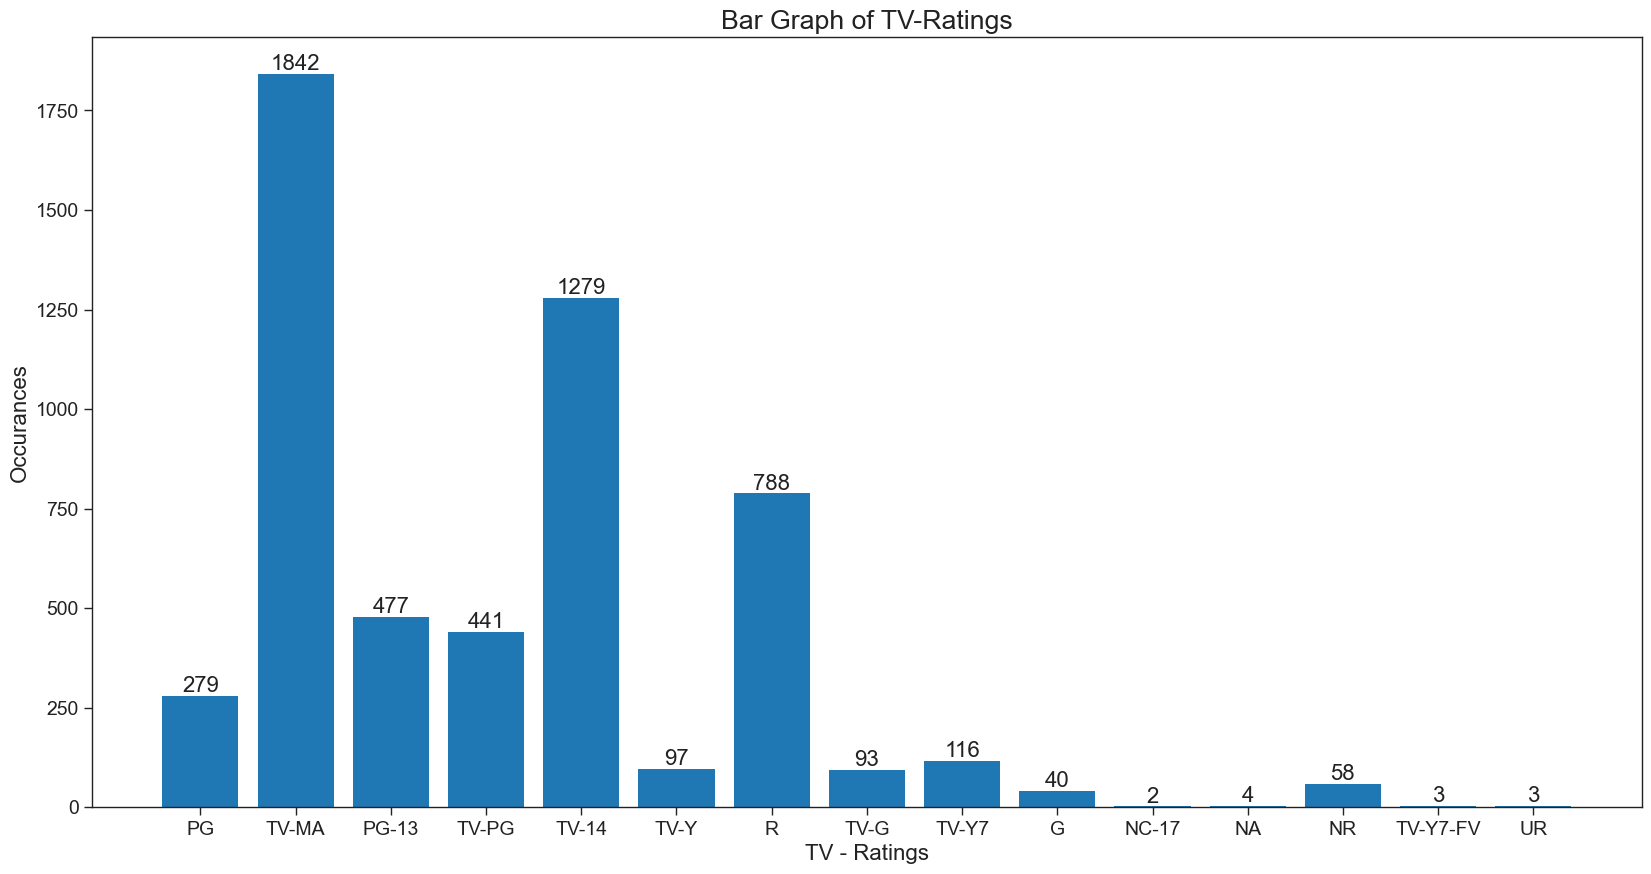

In [118]:
#or graph of TV rating?

#list of all TV-Rating
all_tv_rating = []
for row in json_data:
    #each row means each record
    #each record has 'rating' field
    #append that firld to list of all tv_rating
    all_tv_rating.append(row['rating'])
print("all TV rating: ", all_tv_rating)

#unique tv rating
unique_tv_rating = []
for rating in all_tv_rating:
    if rating in unique_tv_rating:
        continue
    else:
        unique_tv_rating.append(rating)
print("unique tv rating: ", unique_tv_rating)

#calculate occurances of each TV rating in a dict
dict_tv_rating = {}
for unq_rating in unique_tv_rating:
    occ = 0
    for all_rating in all_tv_rating:
        if unq_rating == all_rating:
            occ = occ + 1
    #all_tv_rating list fully transversed
    #occ stores its occurances
    #add (unq_rating, occ) into dict
    dict_tv_rating[unq_rating] = occ

print("dict pairs: ", dict_tv_rating)
#(rating: occurances) pairs are stored in dict_tv_rating

#https://myrestraining.com/blog/programming/how-to-plot-a-dictionary-in-python/#:~:text=To%20plot%20a%20dictionary%20using,color%2C%20width%2C%20and%20labels.


#make a bar graph out of it
keys = list(dict_tv_rating.keys())
values = list(dict_tv_rating.values())
# Creating the bar graph

plt.figure(figsize=(20, 10))  # Adjust figure size as needed
#plt.bar(keys, values)

bars = plt.bar(keys, values)

# Adding labels and title
plt.xlabel('TV - Ratings')
plt.ylabel('Occurances')
plt.title('Bar Graph of TV-Ratings')

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Display the graph
plt.show()

##### Duration?

In [158]:
#do the same for the duration of each movies?
#scatter plot?
    #dots show the duration
    #y axis --> duration
    #x axis --> release years?

#list of all durations
all_duration = []
all_year = []

dict_rating_year_duration = {}
x = 0
for row in json_data:
    #each row means each record
    #each record has 'rating' field
    #append that firld to list of all tv_rating
    #duration in json "43 min", removed the last "_min", replaced with "" and then stored
    all_duration.append(row['duration'].replace(" min", ""))
    all_year.append(row['release_year'])
    dict_rating_year_duration[x] = [row['rating'],row['release_year'],row['duration'].replace(" min", "")]
    x = x + 1


print("all_duration: ", all_duration)
print("all_year: ", all_year)
print("all_all_tv_rating: ", all_tv_rating)

print("dict_rating_year_duration: ", dict_rating_year_duration)


#unique years
unique_years = []
for year in all_year:
    if year in unique_years:
        continue
    else:
        unique_years.append(year)
print("unique years: ",unique_years)
print("# unique years: ",len(unique_years))


print("unique ratings: ",unique_tv_rating)
print("# unique rating: ",len(unique_tv_rating))






all_duration:  ['91', '125', '104', '127', '91', '94', '161', '61', '166', '147', '103', '97', '106', '111', '110', '105', '96', '124', '116', '98', '91', '115', '122', '99', '99', '88', '100', '102', '93', '96', '95', '85', '97', '95', '83', '103', '113', '13', '182', '106', '48', '145', '145', '93', '106', '147', '87', '96', '95', '91', '90', '97', '117', '128', '90', '119', '110', '143', '119', '114', '106', '99', '118', '115', '95', '115', '108', '63', '117', '121', '142', '113', '154', '95', '108', '120', '100', '82', '124', '114', '104', '94', '94', '93', '97', '109', '88', '101', '105', '102', '101', '103', '106', '118', '86', '121', '229', '76', '95', '98', '89', '120', '110', '83', '121', '105', '94', '156', '112', '95', '107', '114', '129', '97', '125', '107', '127', '128', '92', '135', '124', '136', '165', '124', '136', '150', '112', '119', '133', '142', '93', '113', '124', '116', '106', '145', '93', '95', '108', '90', '92', '122', '122', '122', '122', '84', '96', '115', '11

***

#### Old Vs New Movies

In [190]:
#graph for number of movies in each year
#make a dict : {year, # of movies}

#plot them
    #x --> year
    #y --> number of movies

dict_year_numMovies = {}
#key --> year
#value --> number of movie

#unique years --> unique_years --> 72 in total

#set up the dict with {year, 0} for all the values
for year in unique_years:
    dict_year_numMovies[year] = 0

print("Unique years (sorted): ", sorted(unique_years))
print(dict_year_numMovies)

#go over the json file
#check the year of the movie, update the dict value = old value + 1
for movie in json_data:
    dict_year_numMovies[movie['release_year']] = dict_year_numMovies[movie['release_year']] + 1


print(dict_year_numMovies)

print("dict_year_numMovies (sorted): ",dict(sorted(dict_year_numMovies.items(), key=lambda x: x[0])) )



Unique years (sorted):  ['1942', '1944', '1945', '1946', '1947', '1954', '1955', '1956', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
{'2021': 0, '1993': 0, '1996': 0, '1998': 0, '1997': 0, '2010': 0, '2013': 0, '2017': 0, '1975': 0, '1978': 0, '1983': 0, '1987': 0, '2012': 0, '2001': 0, '2002': 0, '2003': 0, '2004': 0, '2011': 0, '2008': 0, '2009': 0, '2007': 0, '2005': 0, '2006': 0, '2018': 0, '2020': 0, '2019': 0, '1994': 0, '2015': 0, '1982': 0, '1989': 0, '2014': 0, '1990': 0, '1991': 0, '1999': 0, '2016': 0, '1986': 0, '1

In [206]:
#this is too many values for bar graphs
#setting the years to have multiple values
#1941 - 1950
#1951 - 1960
#1961 - 1970
#1971 - 1980
#1981 - 1990
#1991 - 2000
#2001 - 2010
#2011 - 2020
#Total of 8 Bars (Better than 72 bars)
#Taking middle points of these years

compact_years = ['1945', '1955', '1965', '1975', '1985', '1995', '2005', '2015', '2025']
dict_year_numMovies_compact = {}
#set up the dict with {year, 0} for all the values
for year in compact_years:
    dict_year_numMovies_compact[year] = 0
print("dict_year_numMovies_compact: ", dict_year_numMovies_compact)

#go over the json file
#check the year of the movie, update the dict value = old value + 1
for movie in json_data:
    if movie['release_year'] <= '1950' :
        dict_year_numMovies_compact['1945'] = dict_year_numMovies_compact['1945'] + 1
    elif movie['release_year'] <= '1960' :
        dict_year_numMovies_compact['1955'] = dict_year_numMovies_compact['1955'] + 1
    elif movie['release_year'] <= '1970' :
        dict_year_numMovies_compact['1965'] = dict_year_numMovies_compact['1965'] + 1
    elif movie['release_year'] <= '1980' :
        dict_year_numMovies_compact['1975'] = dict_year_numMovies_compact['1975'] + 1
    elif movie['release_year'] <= '1990' :
        dict_year_numMovies_compact['1985'] = dict_year_numMovies_compact['1985'] + 1
    elif movie['release_year'] <= '2000' :
        dict_year_numMovies_compact['1995'] = dict_year_numMovies_compact['1995'] + 1
    elif movie['release_year'] <= '2010' :
        dict_year_numMovies_compact['2005'] = dict_year_numMovies_compact['2005'] + 1
    elif movie['release_year'] <= '2020' :
        dict_year_numMovies_compact['2015'] = dict_year_numMovies_compact['2015'] + 1
    elif movie['release_year'] <= '2030' :
        dict_year_numMovies_compact['2025'] = dict_year_numMovies_compact['2025'] + 1

    #dict_year_numMovies_compact[movie['release_year']] = dict_year_numMovies[movie['release_year']] + 1

print("dict_year_numMovies_compact: ", dict_year_numMovies_compact)


dict_year_numMovies_compact:  {'1945': 0, '1955': 0, '1965': 0, '1975': 0, '1985': 0, '1995': 0, '2005': 0, '2015': 0, '2025': 0}
dict_year_numMovies_compact:  {'1945': 5, '1955': 15, '1965': 21, '1975': 72, '1985': 128, '1995': 251, '2005': 780, '2015': 4023, '2025': 227}


['1945', '1955', '1965', '1975', '1985', '1995', '2005', '2015', '2025']
[5, 15, 21, 72, 128, 251, 780, 4023, 227]


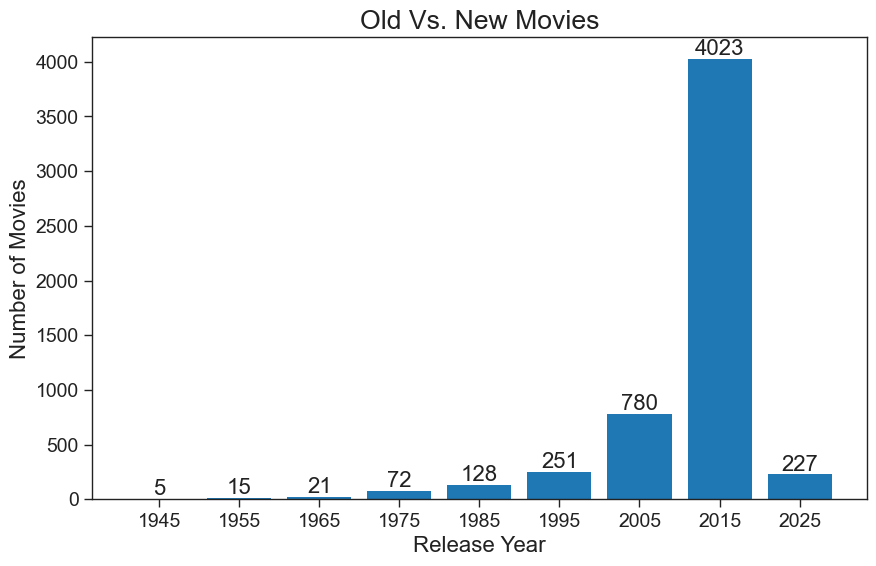

In [211]:
#make a bar graph out of it
years = list(dict_year_numMovies_compact.keys())
num = list(dict_year_numMovies_compact.values())
# Creating the bar graph

print(years)
print(num)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
#plt.bar(keys, values)

bars = plt.bar(years, num, width = 0.8)

#plt.xticks(range(len(years)), years) 

# Adding labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Old Vs. New Movies')

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Display the graph
plt.show()

***

#### Duration Vs Release Year

[91, 125, 104, 127, 91, 94, 161, 61, 166, 147, 103, 97, 106, 111, 110, 105, 96, 124, 116, 98, 91, 115, 122, 99, 99, 88, 100, 102, 93, 96, 95, 85, 97, 95, 83, 103, 113, 13, 182, 106, 48, 145, 145, 93, 106, 147, 87, 96, 95, 91, 90, 97, 117, 128, 90, 119, 110, 143, 119, 114, 106, 99, 118, 115, 95, 115, 108, 63, 117, 121, 142, 113, 154, 95, 108, 120, 100, 82, 124, 114, 104, 94, 94, 93, 97, 109, 88, 101, 105, 102, 101, 103, 106, 118, 86, 121, 229, 76, 95, 98, 89, 120, 110, 83, 121, 105, 94, 156, 112, 95, 107, 114, 129, 97, 125, 107, 127, 128, 92, 135, 124, 136, 165, 124, 136, 150, 112, 119, 133, 142, 93, 113, 124, 116, 106, 145, 93, 95, 108, 90, 92, 122, 122, 122, 122, 84, 96, 115, 110, 88, 102, 91, 105, 135, 140, 133, 92, 82, 97, 94, 121, 97, 110, 64, 59, 101, 127, 114, 108, 98, 86, 139, 111, 115, 102, 100, 135, 95, 97, 124, 118, 115, 115, 104, 106, 97, 87, 88, 114, 90, 142, 90, 105, 103, 116, 113, 99, 96, 148, 189, 97, 102, 99, 85, 112, 91, 91, 141, 130, 98, 105, 101, 105, 118, 97, 102, 1

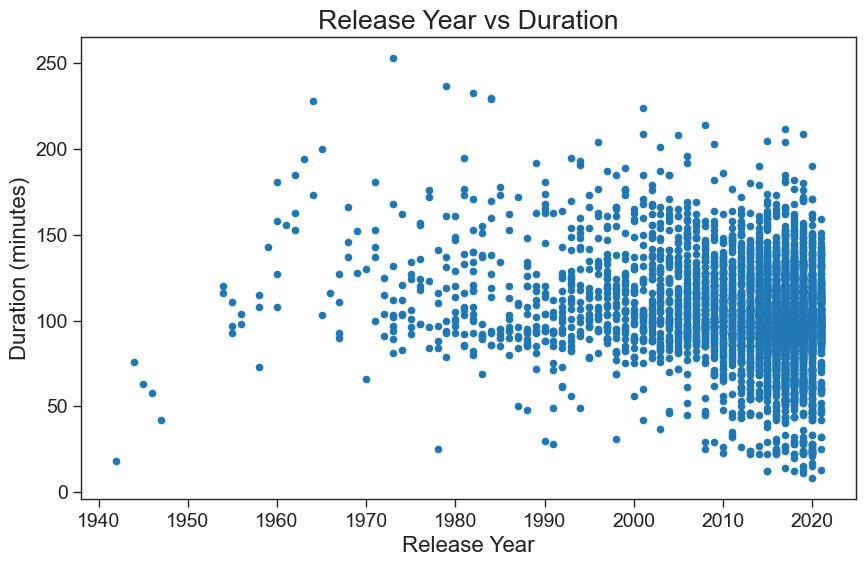

In [216]:
##Making the scater plot 
#Data: released years, TV rating, duration of movies

#all_duration
#all_years
#all_tv_rating
#unique_rating --> 15
#unique_years --> 72
#make the scatter plot

#since the order of the data matters, will use the dictonary to preserve the order
    #get the ordered release years
    #get the ordered movie durations
    #get the ordered rating
#from the dict dict_rating_year_duration
#dict_duration_year:  {0: ['PG', '2021', '91'], 1: ['TV-MA', '1993', '125'],
# Extract release years and durations
release_years = [int(data[1]) for data in dict_rating_year_duration.values()]
durations = [int(data[2]) for data in dict_rating_year_duration.values()]

#####################################################
plt.figure(figsize=(10, 6))

plt.scatter(release_years, durations, s=20)  # Adjust the size of markers if needed

##average duration
print(durations)
print("Average (mean) duration : ", sum(durations)/len(durations), "minutes")



# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.title('Release Year vs Duration')

# Show plot
plt.show()




#### PG rating Vs Release Year

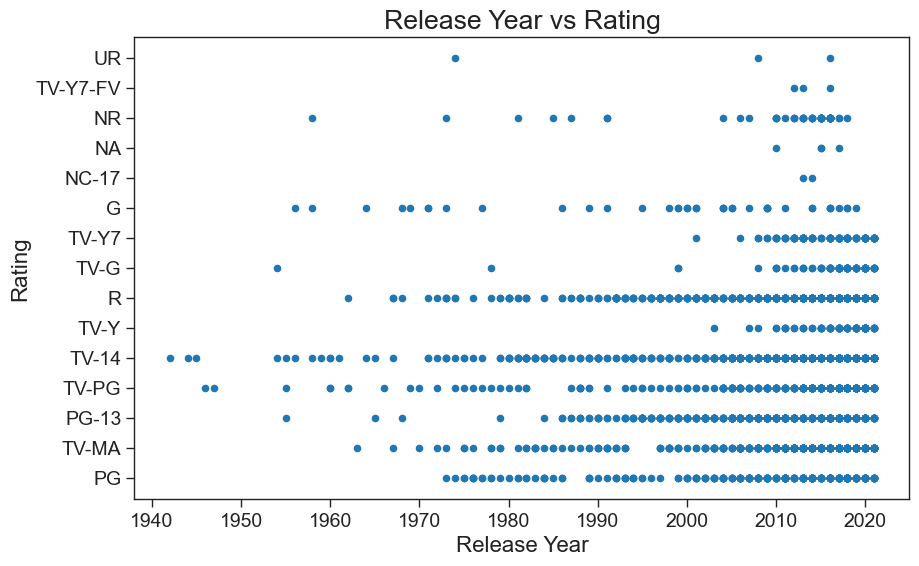

In [176]:
##Making the scater plot 
#Data: released years, TV rating, duration of movies

#all_duration
#all_years
#all_tv_rating
#unique_rating --> 15
#unique_years --> 72
#make the scatter plot

#since the order of the data matters, will use the dictonary to preserve the order
    #get the ordered release years
    #get the ordered movie durations
    #get the ordered rating
#from the dict dict_rating_year_duration
#dict_duration_year:  {0: ['PG', '2021', '91'], 1: ['TV-MA', '1993', '125'],
# Extract release years and rating
release_years = [int(data[1]) for data in dict_rating_year_duration.values()]
rating = [(data[0]) for data in dict_rating_year_duration.values()]

#####################################################
plt.figure(figsize=(10, 6))

plt.scatter(release_years, rating, s=20)  # Adjust the size of markers if needed


# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.title('Release Year vs Rating')

# Show plot
plt.show()

#### PG rating Vs Duration

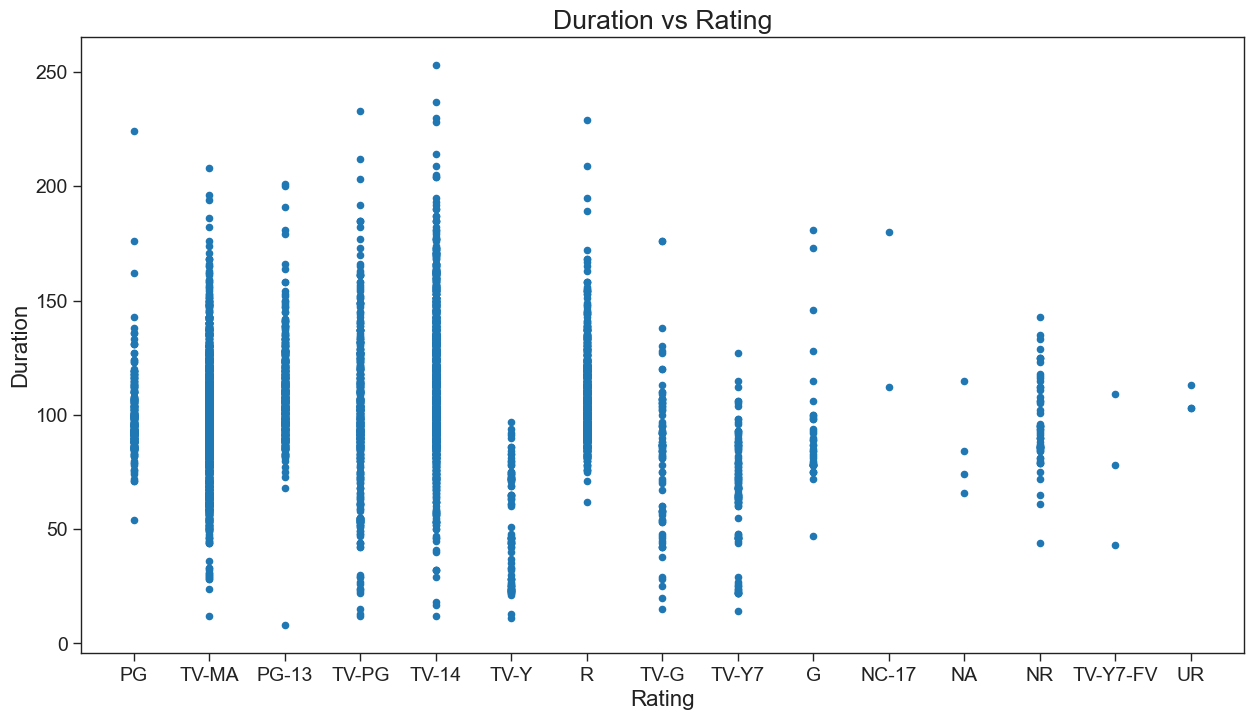

In [174]:
##Making the scater plot 
#Data: released years, TV rating, duration of movies

#all_duration
#all_years
#all_tv_rating
#unique_rating --> 15
#unique_years --> 72
#make the scatter plot

#since the order of the data matters, will use the dictonary to preserve the order
    #get the ordered release years
    #get the ordered movie durations
    #get the ordered rating
#from the dict dict_rating_year_duration
#dict_duration_year:  {0: ['PG', '2021', '91'], 1: ['TV-MA', '1993', '125'],
# Extract release years and rating
duration = [int(data[2]) for data in dict_rating_year_duration.values()]
rating = [(data[0]) for data in dict_rating_year_duration.values()]

#####################################################
plt.figure(figsize=(15, 8))

plt.scatter(rating, duration, s=20)  # Adjust the size of markers if needed


# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.title('Duration vs Rating')

# Show plot
plt.show()

***

#### Listed In

A movie is listed in multiple categories
first separate them and count how many unique categories there are, then see how to represent them

In [232]:
dict_listed_in = {}
all_listed_in = []

#separate values based on ',' and then add to the list
for movie in json_data:
    listed_in = movie['listed_in']
    for genre in listed_in.split(', '):
        all_listed_in.append(genre)
        # if genre == 'Movies':
        #     print(movie['title'])

print(all_listed_in)


#unique listed_in
unique_listed_in = []
for genre in all_listed_in:
    if genre in unique_listed_in:
        continue
    else:
        unique_listed_in.append(genre)

print("unique_listed_in: ",unique_listed_in)
print("# unique_listed_in: ",len(unique_listed_in))


#fill up the dict
for genre in unique_listed_in:
    dict_listed_in[genre] = 0
print("dict_listed_in  ", dict_listed_in)

for genre in all_listed_in:
    dict_listed_in[genre] = dict_listed_in[genre] + 1

print("dict_listed_in  ", dict_listed_in)




['Children & Family Movies', 'Dramas', 'Independent Movies', 'International Movies', 'Comedies', 'Dramas', 'Dramas', 'International Movies', 'Children & Family Movies', 'Comedies', 'Thrillers', 'Comedies', 'International Movies', 'Children & Family Movies', 'Comedies', 'International Movies', 'Romantic Movies', 'Comedies', 'International Movies', 'Music & Musicals', 'Comedies', 'Horror Movies', 'Sci-Fi & Fantasy', 'Thrillers', 'Dramas', 'Independent Movies', 'International Movies', 'Dramas', 'International Movies', 'Thrillers', 'Action & Adventure', 'Dramas', 'International Movies', 'Action & Adventure', 'Dramas', 'Action & Adventure', 'Classic Movies', 'Dramas', 'Dramas', 'Horror Movies', 'Thrillers', 'Action & Adventure', 'Horror Movies', 'Thrillers', 'Action & Adventure', 'Horror Movies', 'Thrillers', 'Action & Adventure', 'Dramas', 'Thrillers', 'Action & Adventure', 'Anime Features', 'International Movies', 'Action & Adventure', 'Anime Features', 'International Movies', 'Action & A

['Children & Family Movies', 'Dramas', 'Independent Movies', 'International Movies', 'Comedies', 'Thrillers', 'Romantic Movies', 'Music & Musicals', 'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure', 'Classic Movies', 'Anime Features', 'Documentaries', 'Sports Movies', 'Cult Movies', 'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy', 'Movies']
[583, 2398, 751, 2548, 1636, 575, 604, 328, 352, 237, 848, 109, 68, 418, 163, 70, 60, 83, 318, 30]


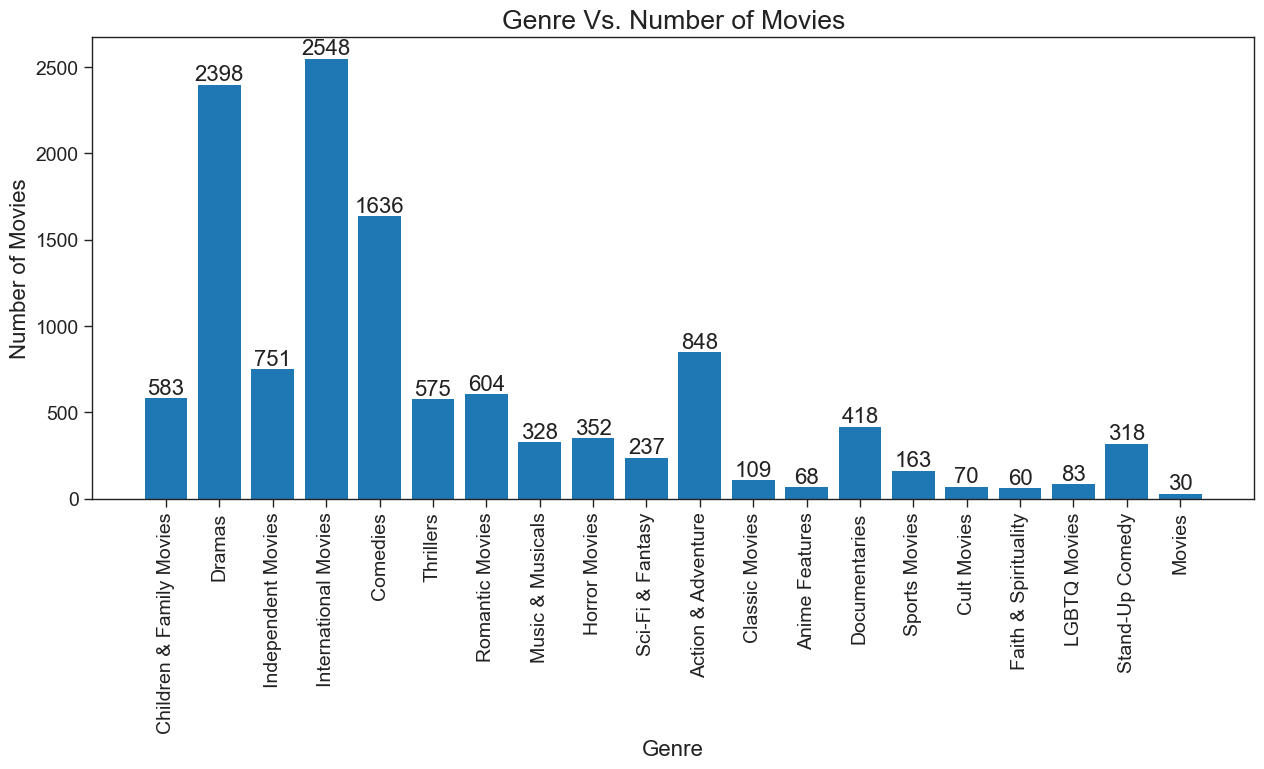

In [233]:

#https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels
#make a bar graph out of it
genre = list(dict_listed_in.keys())
num = list(dict_listed_in.values())
# Creating the bar graph

print(genre)
print(num)
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
#plt.bar(keys, values)

bars = plt.bar(genre, num, width = 0.8)

#plt.xticks(range(len(years)), years) 
plt.xticks(rotation=90)
# Adding labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Genre Vs. Number of Movies')

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Display the graph
plt.show()

***

In [159]:
# ##Making the scater plot 
# #Data: released years, TV rating, duration of movies

# #all_duration
# #all_years
# #all_tv_rating
# #unique_rating --> 15
# #unique_years --> 72
# from collections import defaultdict
# #make the scatter plot

# #getting random colors for each unique rating
# #https://www.tutorialspoint.com/how-to-generate-random-colors-in-matplotlib
# #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# #color map - https://matplotlib.org/stable/users/explain/colors/colormaps.html
#     #tab 20 (contains 20 unique colors)


# #since the order of the data matters, will use the dictonary to preserve the order
#     #get the ordered release years
#     #get the ordered movie durations
#     #get the ordered rating
# #from the dict dict_rating_year_duration
# #dict_duration_year:  {0: ['PG', '2021', '91'], 1: ['TV-MA', '1993', '125'],
# # Extract release years and durations
# rating = [(data[0]) for data in dict_rating_year_duration.values()]
# release_years = [int(data[1]) for data in dict_rating_year_duration.values()]
# durations = [int(data[2]) for data in dict_rating_year_duration.values()]
# #durations on its own are a lot and result in error
# #had to calculate some kind of mean values
# #USED CHAT-GPT FOR THIS
# # Create a dictionary to store mean duration for each release year
# mean_durations = defaultdict(list)
# for year, duration in zip(release_years, durations):
#     mean_durations[year].append(duration)

# # Calculate mean duration for each release year
# mean_duration_values = [np.mean(mean_durations[year]) for year in sorted(mean_durations.keys())]
# release_years_unique = sorted(mean_durations.keys())
# #####################################################
# plt.figure(figsize=(10, 6))
# #assign color to the ratings
# #Create a colormap with 15 colors
# cmap = plt.get_cmap('tab20')
# colors = [cmap(i) for i in np.linspace(0, 1, 15)]

# #color maping to each unique rating (unique_rating)
# rating_color_map = dict(zip(sorted(set(rating)), colors))


# #Ploting the scatter plot
# for i in range(len(release_years)):
#     plt.scatter(release_years[i], mean_durations[i], c=rating_color_map[rating[i]], label=rating[i])


# # Add labels and title
# plt.xlabel('Release Year')
# plt.ylabel('Duration (minutes)')
# plt.title('Release Year vs Duration')
# plt.legend(title='Rating')

# # Show plot
# plt.show()


In [163]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict



# Extract release years, durations, and ratings
rating = [data[0] for data in dict_rating_year_duration.values()]
release_years = [int(data[1]) for data in dict_rating_year_duration.values()]
durations = [int(data[2]) for data in dict_rating_year_duration.values()]


# Create a dictionary to store summary statistics (e.g., mean duration) for each rating category
rating_stats = defaultdict(list)
for rating, duration in zip(rating, durations):
    rating_stats[rating].append(duration)
# Calculate summary statistics for each rating category
rating_means = {rating: np.mean(duration_list) for rating, duration_list in rating_stats.items()}

print(rating)
print(release_years)
print(durations)
# Create a set of unique ratings
unique_ratings = set(rating)

# Create a colormap with a color for each unique rating
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, len(unique_ratings))]

# Create a mapping from rating to color
rating_color_map = dict(zip(unique_ratings, colors))

# Plot summary statistics for each rating category
plt.figure(figsize=(10, 6))
for rating, mean_duration in rating_means.items():
    plt.scatter(mean_duration, 0, color=rating_color_map[rating], label=rating, s=100)


# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.title('Release Year vs Duration')
plt.legend(title='Rating')

# Show plot
plt.show()


TV-14
[2021, 1993, 2021, 2021, 2021, 2021, 1996, 2021, 1998, 1997, 2010, 2013, 2013, 2021, 2021, 2021, 2017, 1975, 1978, 1983, 1987, 2012, 2001, 2002, 2003, 2004, 2001, 2011, 2008, 2009, 2007, 2010, 2005, 2006, 2004, 2021, 2021, 2021, 2018, 2021, 2021, 2020, 2021, 2021, 2021, 2020, 2021, 2021, 2019, 2021, 2018, 2018, 2020, 2017, 2018, 2021, 2021, 1994, 2009, 2015, 2017, 2020, 2003, 2020, 2004, 2017, 2005, 2021, 1982, 2015, 1994, 1993, 2003, 2001, 2010, 1989, 2014, 2015, 2007, 2011, 1990, 1991, 1994, 1998, 1999, 2005, 2016, 1986, 2010, 2018, 2003, 2010, 1996, 2017, 2003, 1999, 1984, 2008, 2001, 2006, 1997, 2017, 2003, 2015, 2003, 1980, 1986, 1961, 2014, 1996, 2000, 2008, 1993, 2008, 2021, 2017, 2008, 2008, 2021, 2006, 2004, 2003, 2005, 2016, 2012, 2001, 2010, 2008, 2010, 2013, 2011, 2014, 2021, 2007, 2011, 2011, 2021, 2020, 2014, 2020, 2021, 2021, 2021, 2021, 2021, 2021, 2018, 2021, 2021, 2021, 2020, 2011, 2021, 1995, 2020, 2015, 2020, 2018, 2021, 2014, 1993, 2020, 2021, 2021, 2021, 201

KeyError: 'PG'

<Figure size 1000x600 with 0 Axes>

In [162]:
# import matplotlib.pyplot as plt
# import numpy as np
# from collections import defaultdict

# # Extract release years, durations, and ratings
# release_years = [int(data[1]) for data in dict_rating_year_duration.values()]
# durations = [int(data[2]) for data in dict_rating_year_duration.values()]

# # Create a dictionary to store mean duration for each release year
# mean_durations = defaultdict(list)
# for year, duration in zip(release_years, durations):
#     mean_durations[year].append(duration)

# # Calculate mean duration for each release year
# mean_duration_values = [np.mean(mean_durations[year]) for year in sorted(mean_durations.keys())]
# release_years_unique = sorted(mean_durations.keys())

# # Plot scatter plot with mean durations
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# plt.scatter(release_years_unique, mean_duration_values, c='blue')

# # Add labels and title
# plt.xlabel('Release Year')
# plt.ylabel('Mean Duration (minutes)')
# plt.title('Mean Duration vs Release Year')

# # Show plot
# plt.show()


In [161]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate random data
# np.random.seed(0)
# x = np.random.rand(100)
# y = np.random.rand(100)
# colors = np.random.rand(100)  # Generate random colors

# # Plot the scatter plot with random colors
# plt.scatter(x, y, c=colors, cmap='rainbow')
# plt.colorbar()  # Add a colorbar to show the mapping between colors and values
# plt.title('Scatter Plot with Random Colors')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()


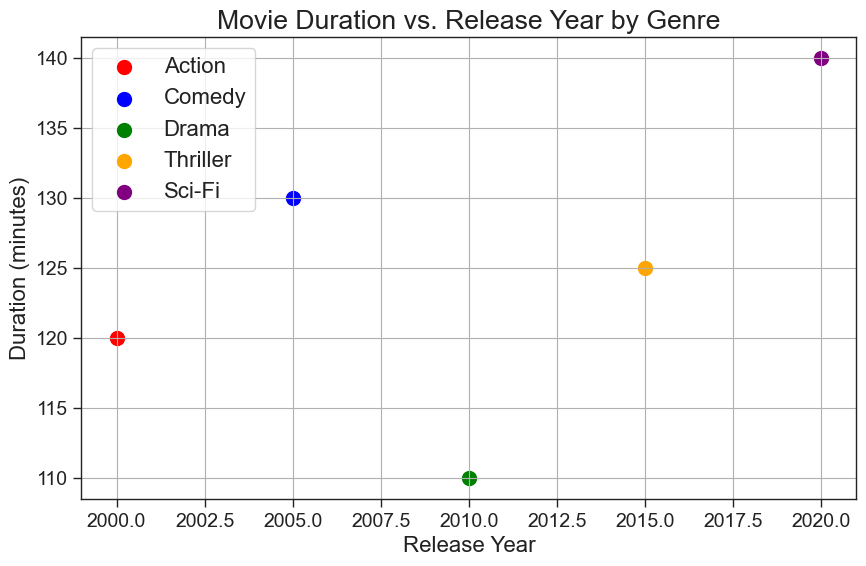

In [120]:
# import matplotlib.pyplot as plt

# # Sample data
# release_years = [2000, 2005, 2010, 2015, 2020]
# durations = [120, 130, 110, 125, 140]
# genres = ['Action', 'Comedy', 'Drama', 'Thriller', 'Sci-Fi']

# # Define colors for each genre
# colors = {'Action': 'red', 'Comedy': 'blue', 'Drama': 'green', 'Thriller': 'orange', 'Sci-Fi': 'purple'}

# # Create the plot
# plt.figure(figsize=(10, 6))
# for year, duration, genre in zip(release_years, durations, genres):
#     plt.scatter(year, duration, color=colors[genre], label=genre, s=100)

# # Add labels and title
# plt.xlabel('Release Year')
# plt.ylabel('Duration (minutes)')
# plt.title('Movie Duration vs. Release Year by Genre')

# # Add legend
# plt.legend()

# # Show the plot
# plt.grid(True)
# plt.show()


***

In [98]:
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    print("Node {0}\t\t\t: {1}".format(node, data))  

Node My Little Pony: A New Generation			: {'type': 'movie', 'label': 'My Little Pony: A New Generation'}
Node Robert Cullen			: {'type': 'director', 'label': 'Robert Cullen'}
Node José Luis Ucha			: {'type': 'director', 'label': 'José Luis Ucha'}
Node Vanessa Hudgens			: {'type': 'cast', 'label': 'Vanessa Hudgens'}
Node Kimiko Glenn			: {'type': 'cast', 'label': 'Kimiko Glenn'}
Node James Marsden			: {'type': 'cast', 'label': 'James Marsden'}
Node Sofia Carson			: {'type': 'cast', 'label': 'Sofia Carson'}
Node Liza Koshy			: {'type': 'cast', 'label': 'Liza Koshy'}
Node Ken Jeong			: {'type': 'cast', 'label': 'Ken Jeong'}
Node Elizabeth Perkins			: {'type': 'cast', 'label': 'Elizabeth Perkins'}
Node Jane Krakowski			: {'type': 'cast', 'label': 'Jane Krakowski'}
Node Michael McKean			: {'type': 'cast', 'label': 'Michael McKean'}
Node Phil LaMarr			: {'type': 'cast', 'label': 'Phil LaMarr'}
Node Sankofa			: {'type': 'movie', 'label': 'Sankofa'}
Node Haile Gerima			: {'type': 'director', '

In [99]:
print("Degree sequence --> ")
print([netflix_graph.degree(node) for node in netflix_graph])


# all nodes (returns a dictionary with node : degree pairs for all nodes)

print(netflix_graph.degree("My Little Pony: A New Generation"))
print(netflix_graph.degree("Robert Cullen"))

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
     if node == "My Little Pony: A New Generation" :
        print("Node {0}\t\t\t: {1}".format(node, data))

print("==============")
# To show the edge relation, we can use the following for loop.
for n1, n2, data in netflix_graph.edges(data=True):
    if node == "My Little Pony: A New Generation" :
        print("{0} <----> {1}: {2}".format(n1, n2, data))
#in this we are showing the edge between nodes and its edge attribute (like edge weight, edge distance) if exists.
        
print(netflix_graph.has_edge("My Little Pony: A New Generation", "Robert Cullen"))


Degree sequence --> 
[12, 1, 1, 7, 3, 12, 3, 2, 11, 4, 8, 3, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 4, 7, 5, 5, 3, 3, 1, 2, 1, 10, 1, 12, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 11, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 11, 1, 5, 5, 2, 1, 1, 1, 3, 1, 1, 1, 7, 1, 2, 1, 1, 1, 13, 2, 6, 5, 5, 5, 5, 5, 1, 5, 1, 1, 9, 2, 7, 3, 3, 6, 5, 5, 12, 4, 20, 10, 13, 6, 9, 12, 10, 15, 7, 3, 1, 11, 3, 3, 4, 8, 2, 1, 1, 1, 1, 1, 1, 11, 6, 3, 11, 11, 12, 4, 6, 1, 2, 5, 2, 10, 2, 4, 2, 5, 3, 2, 9, 2, 3, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 2, 4, 3, 2, 1, 2, 2, 1, 3, 10, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 11, 11, 2, 1, 3, 2, 1, 2, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 11, 1, 12, 2, 1, 2, 2, 5, 1, 1, 1, 1, 9, 2, 1, 3, 2, 5, 2, 1, 5, 11, 1, 10, 13, 7, 13, 10, 2, 2, 11, 4, 2, 12, 5, 8, 4, 6, 5, 2, 7, 3, 6, 3, 7, 11, 7, 7, 8, 2, 7, 8, 7, 5, 3, 4, 1, 9, 5, 5, 3, 11, 2, 3, 2, 11, 1, 1, 11, 5, 9, 9, 6, 7, 3, 2, 3, 2, 2, 3, 12, 2, 3, 1, 1, 4, 3, 3, 2, 14, 2, 1, 1, 3, 2, 2, 22, 1, 1, 1, 5, 1, 1, 1, 5, 1, 2, 1, 2, 5, 1

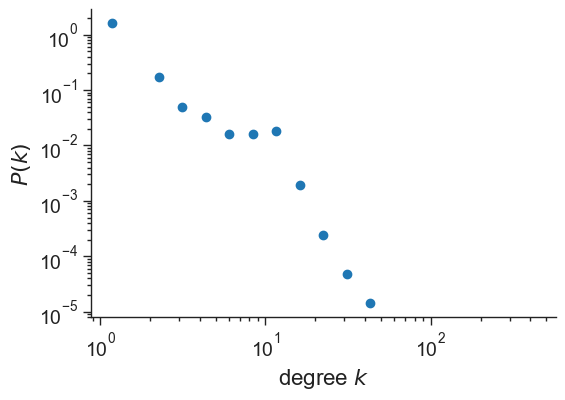

In [100]:
# Let's plot the degree distribution, by calling the function defined above.
plot_degree_dist(netflix_graph)

# Drawing the network
* NetworkX can draw networks using a large number of layout algorithms  
* The results are not as pretty as Gephi, but NetworkX is better for a quick 'n dirty visualization and
gives you finer-grained control over the layout.

In [101]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))

#DO NOT RUN THIS, IT MIGHT TAKE AN HOUR TO FINISH THIS CELL
#UN-COMMENT AT YOUR OWN RISK
#nx.draw_spring(netflix_graph)

<Figure size 800x800 with 0 Axes>

# Plotting the degree distribution

`numpy` can be used to get logarithmically-spaced bins between the minimum and maximum degree

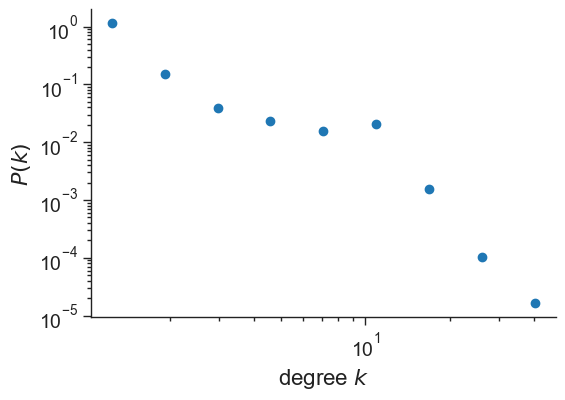

In [102]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2) #reversing the log

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

This is clearly not a network with anything like a heavy-tailed or power law degree distribution.
Let's also plot it in linear-linear scale.

The `linspace` command in `numpy` is used to get linearly-spaced numbers between two extremes

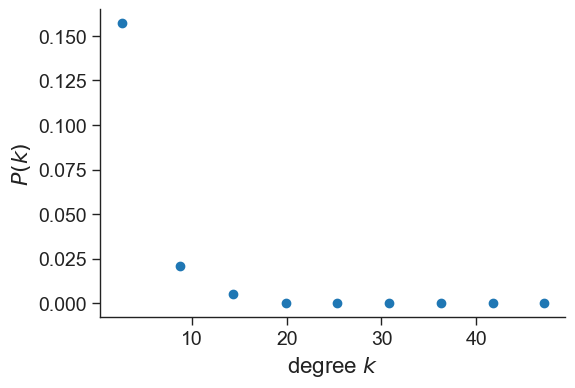

In [103]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

***

In [104]:
# Find the connected components
connected_components = list(nx.connected_components(netflix_graph))

# Get the nodes that belong to components with only one node
disconnected_nodes = [node for node in netflix_graph.nodes() if len([cc for cc in connected_components if node in cc]) == 1]

print("Disconnected nodes:", disconnected_nodes)

for nodes in disconnected_nodes:
    print(nodes)

Disconnected nodes: ['My Little Pony: A New Generation', 'Robert Cullen', 'José Luis Ucha', 'Vanessa Hudgens', 'Kimiko Glenn', 'James Marsden', 'Sofia Carson', 'Liza Koshy', 'Ken Jeong', 'Elizabeth Perkins', 'Jane Krakowski', 'Michael McKean', 'Phil LaMarr', 'Sankofa', 'Haile Gerima', 'Kofi Ghanaba', 'Oyafunmike Ogunlano', 'Alexandra Duah', 'Nick Medley', 'Mutabaruka', 'Afemo Omilami', 'Reggie Carter', 'Mzuri', 'The Starling', 'Theodore Melfi', 'Melissa McCarthy', "Chris O'Dowd", 'Kevin Kline', 'Timothy Olyphant', 'Daveed Diggs', 'Skyler Gisondo', 'Laura Harrier', 'Rosalind Chao', 'Kimberly Quinn', 'Loretta Devine', 'Ravi Kapoor', 'Je Suis Karl', 'Christian Schwochow', 'Luna Wedler', 'Jannis Niewöhner', 'Milan Peschel', 'Edin Hasanović', 'Anna Fialová', 'Marlon Boess', 'Victor Boccard', 'Fleur Geffrier', 'Aziz Dyab', 'Mélanie Fouché', 'Elizaveta Maximová', 'Confessions of an Invisible Girl', 'Bruno Garotti', 'Klara Castanho', 'Lucca Picon', 'Júlia Gomes', 'Marcus Bessa', 'Kiria Malheir

In [105]:
node_to_check = "Zubaan"

# Get the neighbors of the specified node
neighbors = list(netflix_graph.neighbors(node_to_check))

print("Neighbors of node", node_to_check, ":", neighbors)

Neighbors of node Zubaan : ['Sarah-Jane Dias', 'Meghna Malik', 'Vicky Kaushal', 'Manish Chaudhary', 'Mozez Singh', 'Raaghav Chanana', 'Malkeet Rauni', 'Anita Shabdish', 'Chittaranjan Tripathy']


In [106]:
node_to_check = "Menahi"

# Get the neighbors of the specified node
neighbors = list(netflix_graph.neighbors(node_to_check))

print("Neighbors of node", node_to_check, ":", neighbors)

print(netflix_graph.degree(node_to_check)) # returns an integer

Neighbors of node Menahi : ['Abdel Imam Abdullah', 'Ayman Makram', 'Fayez Al-Malki', 'Mona Wasef', 'Reem Abdel Aziz', 'Dana Jabr', 'Emad Al Youssef', 'Remas Mansoor', 'Khalid Mengah']
9


In [107]:
node_to_check = "Casino Tycoon"

# Get the neighbors of the specified node
neighbors = list(netflix_graph.neighbors(node_to_check))

print("Neighbors of node", node_to_check, ":", neighbors)

print(netflix_graph.degree(node_to_check)) # returns an integer

Neighbors of node Casino Tycoon : ['Wong Jing']
1


In [108]:
# Find isolated nodes
isolated_nodes = [node for node, degree in netflix_graph.degree() if degree == 0]

print("Isolated nodes:", isolated_nodes)

# Find the connected components
connected_components = list(nx.connected_components(netflix_graph))

print("Number of connected components:", len(connected_components))
print("Connected components:", connected_components)

Isolated nodes: []
Number of connected components: 512
Connected components: [{'Robert Zemeckis', 'Chetan', 'Kate Braithwaite', 'Doubt', 'Emily Rudd', 'Rik Reinholdtsen', 'Gurdip Kohli', 'Walter Koenig', 'Chelsea Magritte', 'Lynita Crofford', 'Patrick Catalifo', 'John Charles Njie', 'Majid Majidi', 'Rob Burnett', 'Jason Newman', 'Ashok Nanda', 'Sophie Traub', 'Tim Story', 'Lulu Antariksa', 'Erik Per Sullivan', 'Sapol Assawamunkong', 'Rusty Nixon', 'Tatiana Maslany', 'Mark Rylance', 'Charlotte Vega', 'Jhilmil Hazrika', 'Andre Jacobs', 'Indra Brotolaras', 'Dark Crimes', 'Rahasya Gorak', 'Fate of Alakada', 'Corbin Bernsen', 'Władysław Kowalski', 'Sasheer Zamata', 'Nirina Zubir', 'Kardec', 'Dave Chappelle', 'Horeya Farghaly', 'Aishwarya Rajesh', 'Maria Bamford: The Special Special Special', 'Kayode Olaiya', 'Vivek Mushran', 'Fanatic', 'Bassem Samra', 'Lucy Aarden', 'Atsushi Arai', 'Ravikanth Perepu', 'Torbaaz', 'Akara Amarttayakul', 'Alan Devlin', 'Seiji Mizushima', 'David Morse', 'Pål Sve

In [109]:
# ...and calculate the clustering coefficient and average path length

C = np.mean(list(nx.clustering(netflix_graph).values()))
d = nx.average_shortest_path_length(netflix_graph,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

# C --> clustering coeff
# d --> Average shortest path.

NetworkXError: Graph is not connected.

the avobe is for the real network of US airports, below is what we make and compare it with Erdos Renyi random graph

## Comparing to an Erdös-Renyi graph of similar size

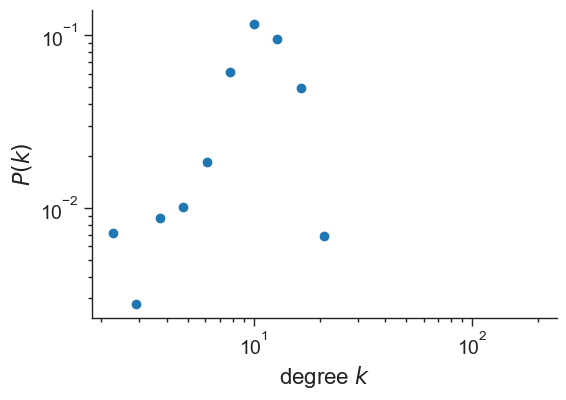

In [ ]:
GN = len(G.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

# we are using (n,p) model for Erdos-Renyi graphs
# n --> number of nodes (GN)
# p --> probability, calculated above.

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

the avobe is the degree graph of random graph, for a single graph, but we should have multiple graphs, that is done in the following code
<br>

100 nodes comparision is good but higher a number, the better the comparision is 

In [ ]:
# This is just one instance of a random graph. We need to create an ensemble.

clustering_ER = []
short_path_ER = []

for i in range(100): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values()))
    if nx.is_connected(ER)==True:                                                   #if the graph is not connected, we will ignore that graph, then we calculate the shortest path lengt values
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    
print(np.mean(clustering_ER))
print(np.std(clustering_ER))

print(np.mean(short_path_ER))
print(np.std(short_path_ER))

0.02376495345126727
0.0015024170804327725
2.765027174348698
0.01493050617508055


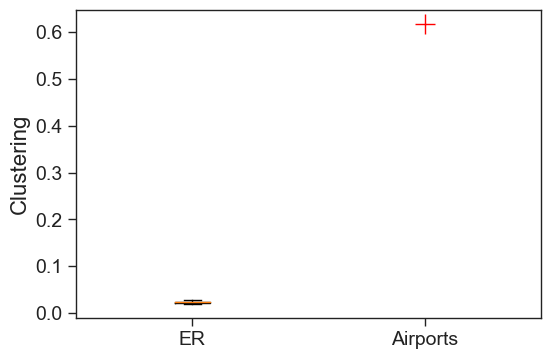

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(clustering_ER)
plt.plot(2,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Airports'])
plt.ylabel('Clustering')
plt.xlim([0.5,2.5])
plt.show()

the random graph has low value and our data has different value

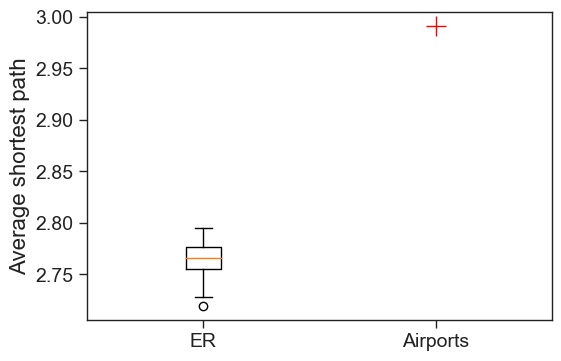

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_ER)
plt.plot(2,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Airports'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,2.5])
plt.show()

the above we coampare the clustering and average shortest path

## Is an ER network a fair comparison?

Many network metrics are highly sensitive to the degree distribution - which can be very different in an ER network. Let's look at a degree-preserving randomisation: **double edge swaps.**

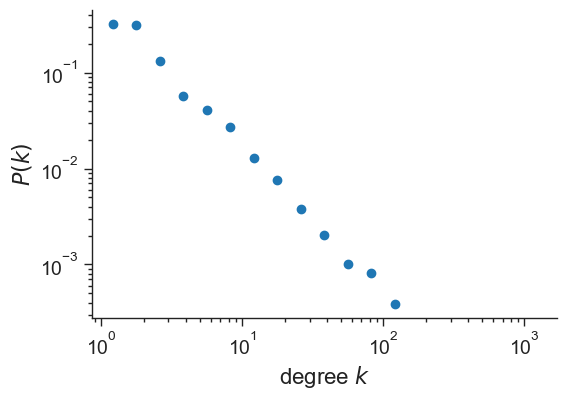

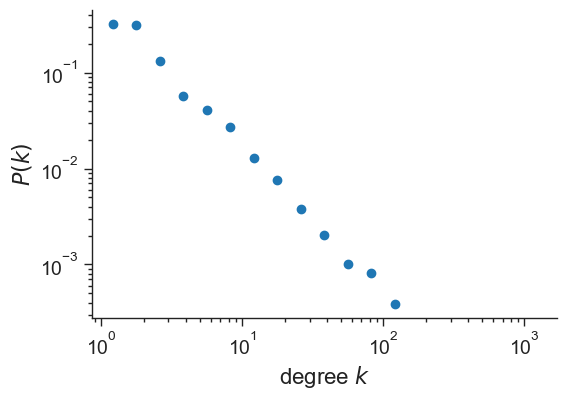

In [ ]:
# Calculating metrics for a Degree Preservation Graph
#first make sure you have copy of the graph before the doing the double edge swaps.

DP = G.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
plot_degree_dist(DP)
plot_degree_dist(G)

#then we plot the degree distribution of original graph G and swapped graph DP
#these two plots should be same.
#then we do the same analysis on the these random graphs.

In [ ]:
# Let's create the ensemble.

clustering_DP = []
short_path_DP = []

for i in range(100): # 1000 is better
    
    nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))

0.4727073625140769
0.010403409193664278
2.587564729458918
0.009806172369589581


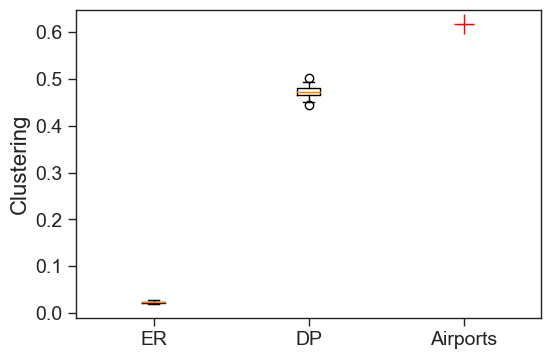

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([clustering_ER,clustering_DP], positions=[1,2])
plt.plot(3,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Airports'])
plt.ylabel('Clustering')
plt.xlim([0.5,3.5])
plt.show()

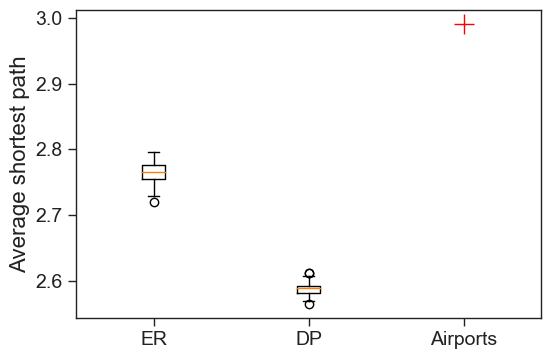

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([short_path_ER,short_path_DP], positions=[1,2])
plt.plot(3,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Airports'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,3.5])
plt.show()

***

## Now it's your turn

You also have networks for:

- Dolphin social network
- Football network

You can also visit the ICON to try out more networks.

Examine their clustering and shortest path lengths and compare to suitable random networks. Are they higher or lower than expected? What might this mean?

62
159
Average Clustering Coefficient:  0.2589582460550202
Average Shortest Path:  3.3569539925965097


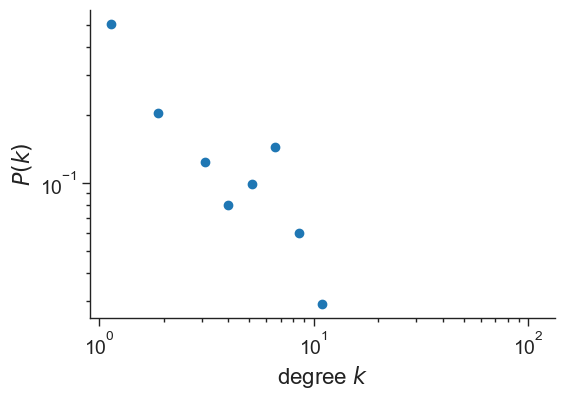

In [ ]:
# Read in the Dolphin network
#loads the txt file into grpah 'G'
#DolphinG = nx.read_weighted_edgelist("dolphins.gnl")
DolphinG = nx.read_gml("dolphins.gml")
print(DolphinG.number_of_nodes())
print(DolphinG.number_of_edges())
# Let's plot the degree distribution, by calling the function defined above.

plot_degree_dist(DolphinG)
# ...and calculate the clustering coefficient and average path length

Dolphin_C = np.mean(list(nx.clustering(DolphinG).values()))
Dolphin_d = nx.average_shortest_path_length(DolphinG,weight=None)

print("Average Clustering Coefficient: ", Dolphin_C)
print("Average Shortest Path: ", Dolphin_d)

# C --> clustering coeff
# d --> Average shortest path.

Comparing to an Erdos-Renyi Graph of similar size

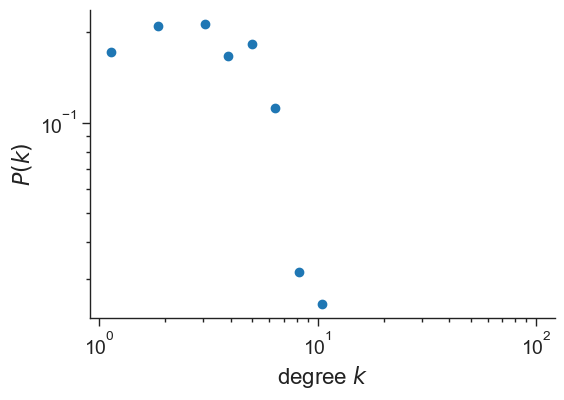

In [ ]:
GN = len(DolphinG.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(DolphinG.edges())
p = actual_L/max_L

# we are using (n,p) model for Erdos-Renyi graphs
# n --> number of nodes (GN)
# p --> probability, calculated above.

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

0.08183667811473788
0.02198606286301144
2.6679439450026443
0.10614428943518897


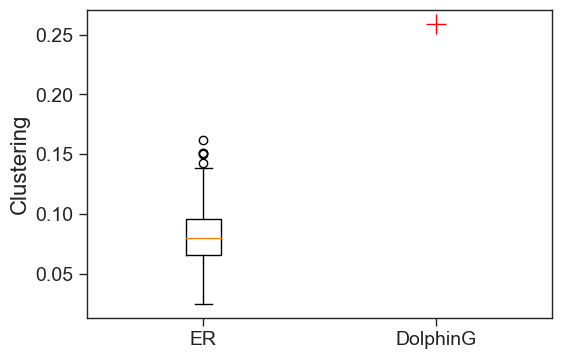

In [ ]:
# This is just one instance of a random graph. We need to create an ensemble.

clustering_ER = []
short_path_ER = []

for i in range(1000): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values()))
    if nx.is_connected(ER)==True:                                                   #if the graph is not connected, we will ignore that graph, then we calculate the shortest path lengt values
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    
print(np.mean(clustering_ER))
print(np.std(clustering_ER))

print(np.mean(short_path_ER))
print(np.std(short_path_ER))
fig = plt.figure(figsize=(6,4))

plt.boxplot(clustering_ER)
plt.plot(2,Dolphin_C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','DolphinG'])
plt.ylabel('Clustering')
plt.xlim([0.5,2.5])
plt.show()

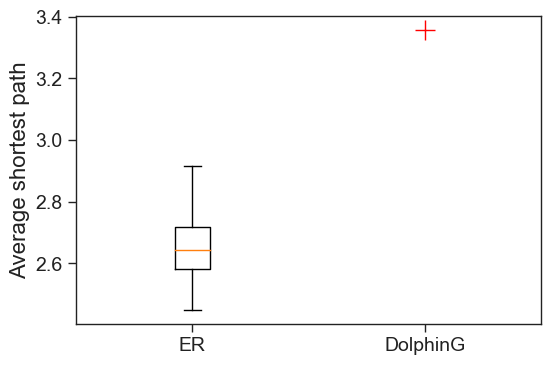

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_ER)
plt.plot(2,Dolphin_d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','DolphinG'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,2.5])
plt.show()

## Is an ER network a fair comparison?

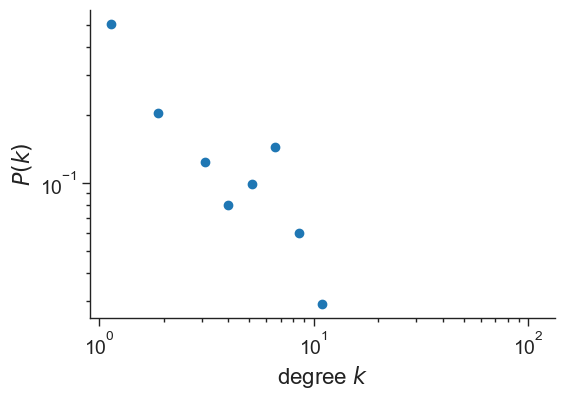

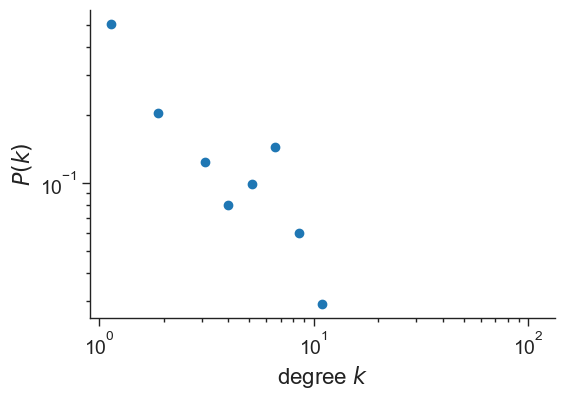

In [ ]:
# Calculating metrics for a Degree Preservation Graph
#first make sure you have copy of the graph before the doing the double edge swaps.

DP = DolphinG.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*DolphinG.number_of_edges(),max_tries=100000)
plot_degree_dist(DP)
plot_degree_dist(DolphinG)

#then we plot the degree distribution of original graph G and swapped graph DP
#these two plots should be same.
#then we do the same analysis on the these random graphs.

0.09572456244472373
0.019567567818423587
2.7127022739291378
0.03940695862624563


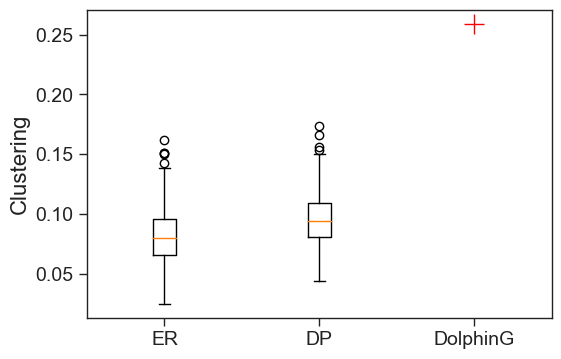

In [ ]:
# Let's create the ensemble.

clustering_DP = []
short_path_DP = []

for i in range(1000): # 1000 is better
    
    nx.double_edge_swap(DP,nswap=10*DolphinG.number_of_edges(),max_tries=100000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))
fig = plt.figure(figsize=(6,4))

plt.boxplot([clustering_ER,clustering_DP], positions=[1,2])
plt.plot(3,Dolphin_C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','DolphinG'])
plt.ylabel('Clustering')
plt.xlim([0.5,3.5])
plt.show()

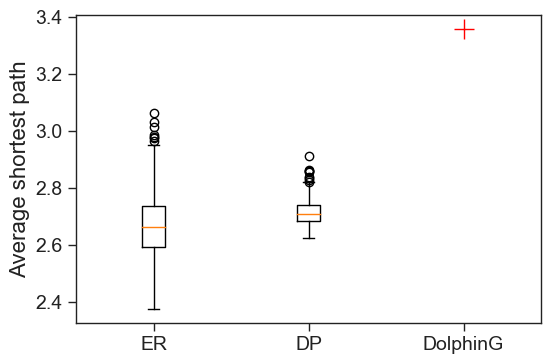

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([short_path_ER,short_path_DP], positions=[1,2])
plt.plot(3,Dolphin_d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','DolphinG'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,3.5])
plt.show()

***

115
613
Average Clustering Coefficient:  0.40321601104209803
Average Shortest Path:  2.5081617086193746


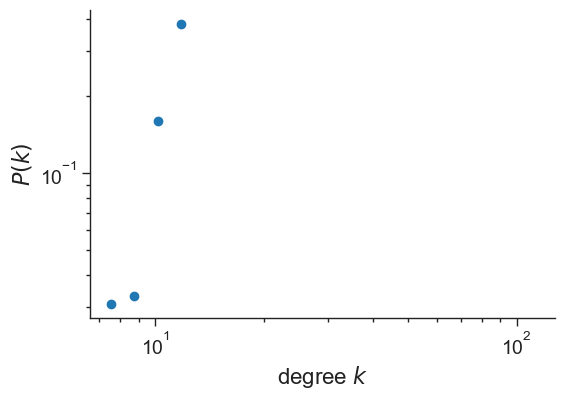

In [ ]:
# Read in the Football network
#loads the txt file into grpah 'G'
FootballG = nx.read_gml("football.gml")
print(FootballG.number_of_nodes())
print(FootballG.number_of_edges())
# Let's plot the degree distribution, by calling the function defined above.

plot_degree_dist(FootballG)
# ...and calculate the clustering coefficient and average path length

Football_C = np.mean(list(nx.clustering(FootballG).values()))
Football_d = nx.average_shortest_path_length(FootballG,weight=None)

print("Average Clustering Coefficient: ", Football_C)
print("Average Shortest Path: ", Football_d)

# C --> clustering coeff
# d --> Average shortest path.

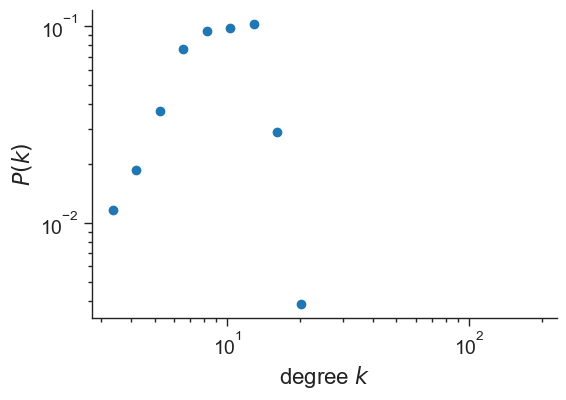

In [ ]:
GN = len(FootballG.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(FootballG.edges())
p = actual_L/max_L

# we are using (n,p) model for Erdos-Renyi graphs
# n --> number of nodes (GN)
# p --> probability, calculated above.

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

0.09328461176855973
0.007647258511711311
2.2445636918382914
0.0314405956716241


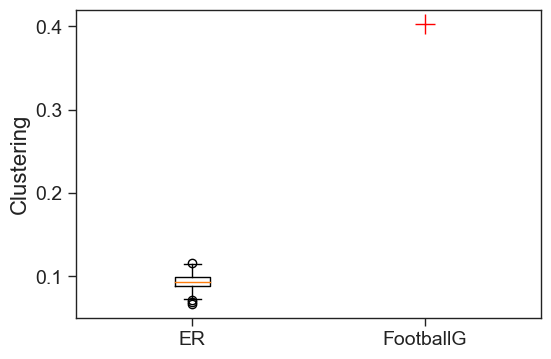

In [ ]:
# This is just one instance of a random graph. We need to create an ensemble.

clustering_ER = []
short_path_ER = []

for i in range(1000): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values()))
    if nx.is_connected(ER)==True:                                                   #if the graph is not connected, we will ignore that graph, then we calculate the shortest path lengt values
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    
print(np.mean(clustering_ER))
print(np.std(clustering_ER))

print(np.mean(short_path_ER))
print(np.std(short_path_ER))
fig = plt.figure(figsize=(6,4))

plt.boxplot(clustering_ER)
plt.plot(2,Football_C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','FootballG'])
plt.ylabel('Clustering')
plt.xlim([0.5,2.5])
plt.show()

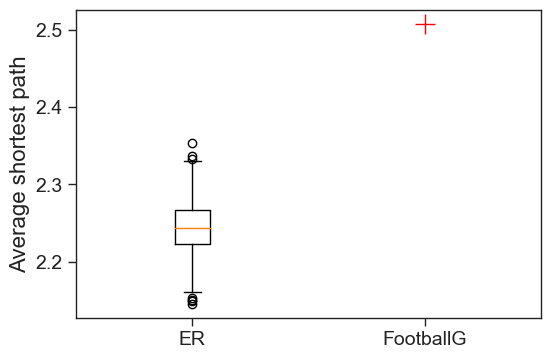

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_ER)
plt.plot(2,Football_d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','FootballG'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,2.5])
plt.show()

## Is an ER network a fair comparison?

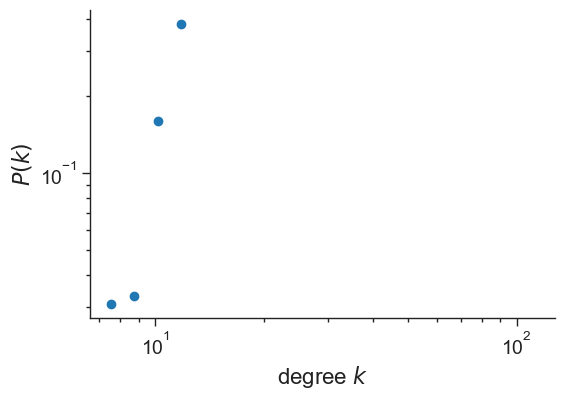

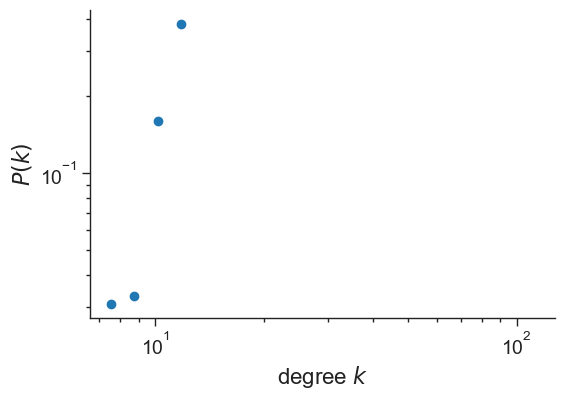

In [ ]:
# Calculating metrics for a Degree Preservation Graph
#first make sure you have copy of the graph before the doing the double edge swaps.

DP = FootballG.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*FootballG.number_of_edges(),max_tries=100000)
plot_degree_dist(DP)
plot_degree_dist(FootballG)

#then we plot the degree distribution of original graph G and swapped graph DP
#these two plots should be same.
#then we do the same analysis on the these random graphs.

0.07918504297634732
0.005782476808643643
2.239099313501144
0.005182477567924845


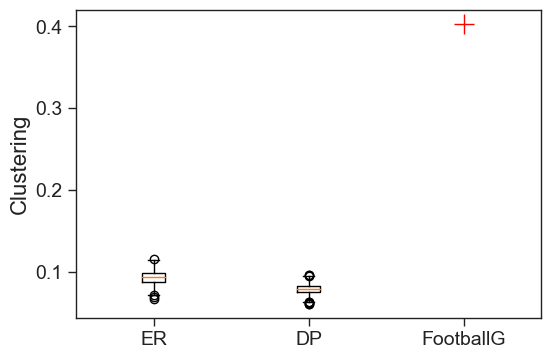

In [ ]:
# Let's create the ensemble.

clustering_DP = []
short_path_DP = []

for i in range(1000): # 1000 is better
    
    nx.double_edge_swap(DP,nswap=10*FootballG.number_of_edges(),max_tries=100000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))
fig = plt.figure(figsize=(6,4))

plt.boxplot([clustering_ER,clustering_DP], positions=[1,2])
plt.plot(3,Football_C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','FootballG'])
plt.ylabel('Clustering')
plt.xlim([0.5,3.5])
plt.show()

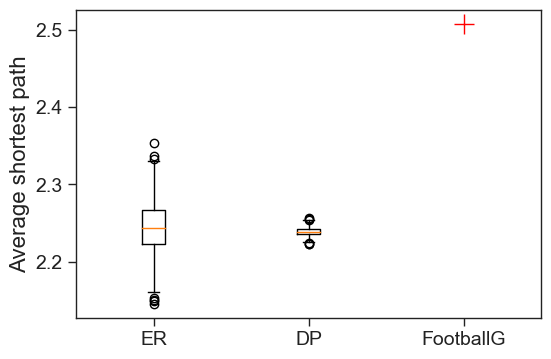

: 

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([short_path_ER,short_path_DP], positions=[1,2])
plt.plot(3,Football_d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','FootballG'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,3.5])
plt.show()